# Affinity Propagation and BIRCH Examples

Message-passing and streaming clustering algorithms for exemplar discovery and CF-tree summaries.

## Setup

We import NumPy and Clustor, configure NumPy printing for readability, and create a small dataset with two obvious clusters.

In [1]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

root = Path.cwd()
if not (root / "python").exists():
    for parent in root.parents:
        if (parent / "python").exists():
            root = parent
            break

sys.path.insert(0, str(root / "python"))

import clustor  # noqa: E402

np.set_printoptions(precision=6, suppress=True)

X = np.array(
    [
        [0.0, 0.0],
        [0.0, 1.0],
        [1.0, 0.0],
        [10.0, 10.0],
        [10.0, 11.0],
        [11.0, 10.0],
    ],
    dtype=np.float64,
)

X

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [10., 10.],
       [10., 11.],
       [11., 10.]])

## Affinity Propagation

Affinity Propagation chooses exemplars without pre-specifying cluster count.

In [2]:
ap = clustor.AffinityPropagation(damping=0.6, max_iter=200, convergence_iter=15)
ap_out = ap.fit(X)
ap_out["exemplars"]

array([0, 3])

In [3]:
ap_out["labels"]

array([0, 0, 0, 1, 1, 1])

In [4]:
ap_out["converged"]

True

## Birch

Birch incrementally builds a clustering feature tree and optionally reclusters.

In [5]:
br = clustor.Birch(threshold=1.5, branching_factor=10, n_clusters=2)
br_out = br.fit(X)
br_out["centers"]

array([[10.333333, 10.333333],
       [ 0.333333,  0.333333]])

In [6]:
br_out["labels"]

array([1, 1, 1, 0, 0, 0])

In [7]:
br_out["n_subclusters"]

2

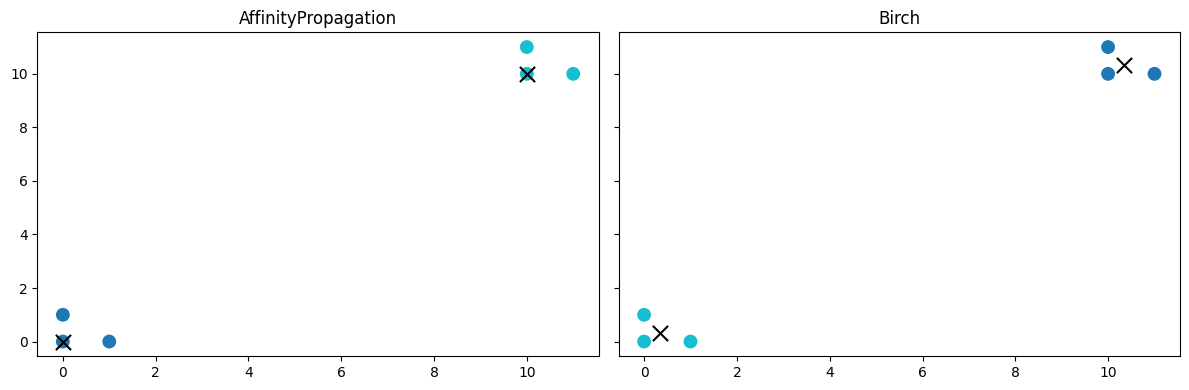

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)
axes[0].scatter(X[:, 0], X[:, 1], c=ap_out["labels"], cmap="tab10", s=80)
exemplars = ap_out["exemplars"]
axes[0].scatter(X[exemplars, 0], X[exemplars, 1], c="black", marker="x", s=120)
axes[0].set_title("AffinityPropagation")
axes[1].scatter(X[:, 0], X[:, 1], c=br_out["labels"], cmap="tab10", s=80)
axes[1].scatter(
    br_out["centers"][:, 0], br_out["centers"][:, 1], c="black", marker="x", s=120
)
axes[1].set_title("Birch")
plt.tight_layout()